In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal

import sys
sys.path.append('../core/')
from te import bi_te, mv_te
from entropy import entropy
from mi import mi_multiLag
from statsTools import hist

import os
import h5py

sys.path.append('../fromUQit_ts/')
import stats_ts

Axially minimal pipe: the temporal coefficients have real and imaginary parts

In [2]:
/home/t28465sr/Desktop/myData/UoM/minimalPipe_pod

NameError: name 'home' is not defined

In [17]:
# load dataset and select 2 modes
dir = '/home/t28465sr/Desktop/myData/UoM/minimalPipe_pod/'

# print the keys of both h5 files
with h5py.File(os.path.join(dir, 'T_coeff_new.mat'), 'r') as f:
    print("Keys in T_coeff_new.mat:", list(f.keys()))
with h5py.File(os.path.join(dir, 'T_coeff_imag.mat'), 'r') as f:
    print("Keys in T_coeff_imag.mat:", list(f.keys()))

data_min_symmetry = np.array(h5py.File(os.path.join(dir, 'T_coeff_real.mat'), 'r')['T_coeff']).astype(np.float64).T
data_min = data_min_symmetry[len(data_min_symmetry)//2:, :]

data_min_im_symmetry = np.array(h5py.File(os.path.join(dir, 'T_coeff_imag.mat'), 'r')['T_coeff_imag']).astype(np.float64).T
data_min_im = data_min_im_symmetry[len(data_min_im_symmetry)//2:, :]

# modes to select
selection = [8, 9]

# which time steps to select
time = 6000

modes = data_min[:time, selection]
modes_i = data_min_im[:time, selection]

print(f'Modes shape: {modes.shape}')
print(f'Number of time steps: {modes.shape[0]}')
print(f'Number of modes: {modes.shape[1]}')

Keys in T_coeff_new.mat: []
Keys in T_coeff_imag.mat: ['T_coeff_imag']
Modes shape: (6000, 2)
Number of time steps: 6000
Number of modes: 2


In [18]:
mode1 = modes[:, 0]
mode2 = modes[:, 1]

mode1_i = modes_i[:, 0]
mode2_i = modes_i[:, 1]

mode1_c = mode1 + 1j * mode1_i
mode2_c = mode2 + 1j * mode2_i

In [109]:
#keep only real part of the hilbert transformed time series

x1 = mode1_c.real
x2 = mode2_c.real

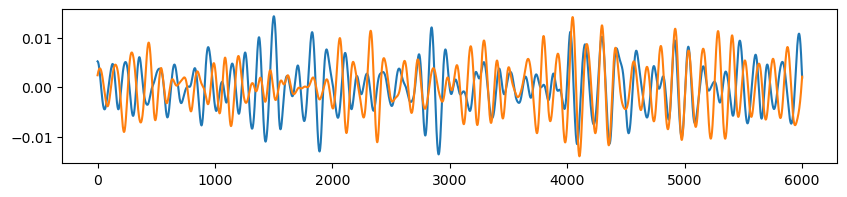

In [97]:
plt.figure(figsize=(10,2))
plt.plot(x1)
plt.plot(x2)

In [98]:
a_ = np.mean(x2)
b_ = np.std(x2)

print(a_,b_)

x1_ = (x1-a_)/b_
x2_ = (x2-a_)/b_

-1.9681646158820362e-05 0.004879577277444778


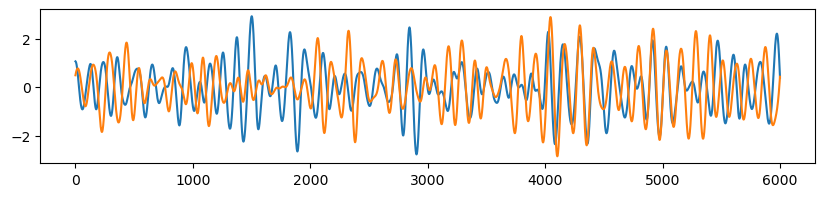

In [99]:
plt.figure(figsize=(10,2))
plt.plot(x1_)
plt.plot(x2_)

Entropy

In [100]:
#Entropy - Binning method
H_bin = entropy(x2_).binning(nbin=20)

#Entropy - KDE method
H_kde = entropy(x2_).kde()

#Entropy - KL (KNN) method
H_kl = entropy(x2_).kl(k=30)

print("H - Binning method:",H_bin)
print("H - KDE method:",H_kde)
print("H - KL method:",H_kl)

H - Binning method: 4.903841932505728
H - KDE method: 1.4120074692338431
H - KL method: 1.4099063405788654


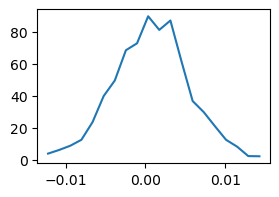

In [101]:
p_,bin_ = hist(x1,nbin=20,plot=True)


## TE for time series

In [102]:
lagList=[1,2,3,5,7,10]   #lags at which TE will be estimated

te_ksg_xy=[]
te_ksg_yx=[]

for lag in lagList:   
    
    te1_ = bi_te(x1_, x2_, embDim=lag).ksg(k=10)
    te_ksg_xy.append(te1_)
    
    te2_ = bi_te(x2_, x1_, embDim=lag).ksg(k=10)
    te_ksg_yx.append(te2_)
    
te_ksg_xy = np.array(te_ksg_xy)    
te_ksg_yx = np.array(te_ksg_yx)        

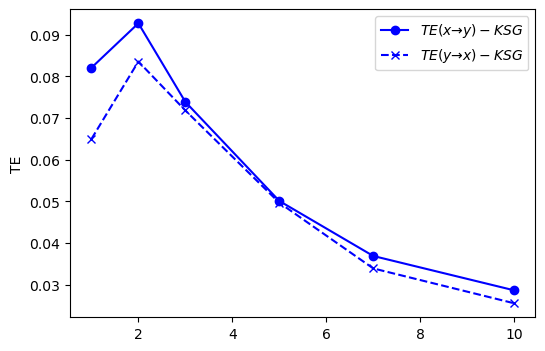

In [103]:
plt.figure(figsize=(6,4))

plt.plot(lagList,te_ksg_xy,'-ob',label=r'$TE(x\to y) - KSG$')    
plt.plot(lagList,te_ksg_yx,'--xb',label=r'$TE(y\to x) - KSG$')    

plt.legend(loc='best')
plt.ylabel('TE')
plt.show()

## Hilbert Transform

In [104]:
h1 = signal.hilbert(x1_)
s1 = abs(h1)  #magnitude of the signal
a1 = np.arctan2(h1.imag,h1.real)

h2 = signal.hilbert(x2_)
s2 = abs(h2)  #magnitude of the signal
a2 = np.arctan2(h2.imag,h2.real)

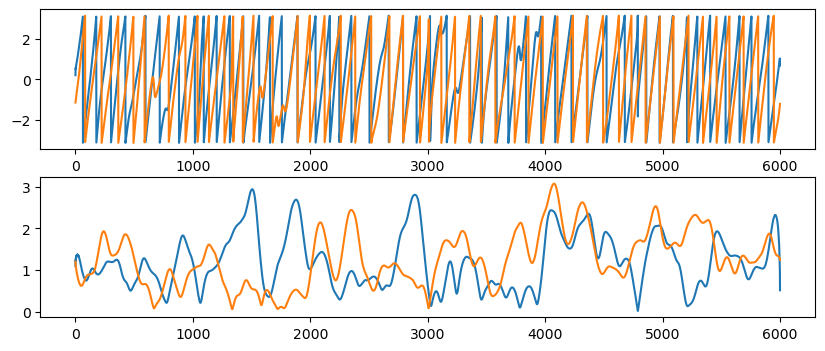

In [105]:
plt.figure(figsize=(10,4))
plt.subplot(211)
plt.plot(a1)
plt.plot(a2)

plt.subplot(212)
plt.plot(s1)
plt.plot(s2)
plt.show()

## TE for phase time series (phase TE)

In [106]:
lagList=[1,2,5]   #lags at which TE will be estimated

te_ksg_xy=[]
te_ksg_yx=[]

for lag in lagList:   
    
    te1_ = bi_te(a1, a2, embDim=lag).ksg(k=3)
    te_ksg_xy.append(te1_)
    
    te2_ = bi_te(a2, a1, embDim=lag).ksg(k=3)
    te_ksg_yx.append(te2_)
    
te_ksg_xy = np.array(te_ksg_xy)    
te_ksg_yx = np.array(te_ksg_yx)        

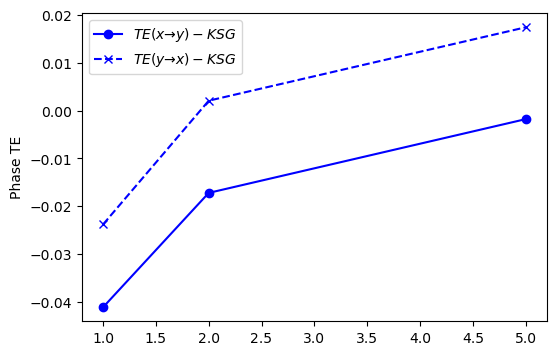

In [107]:
plt.figure(figsize=(6,4))

plt.plot(lagList,te_ksg_xy,'-ob',label=r'$TE(x\to y) - KSG$')    
plt.plot(lagList,te_ksg_yx,'--xb',label=r'$TE(y\to x) - KSG$')    

plt.legend(loc='best')
plt.ylabel('Phase TE')
plt.show()

## Analysis

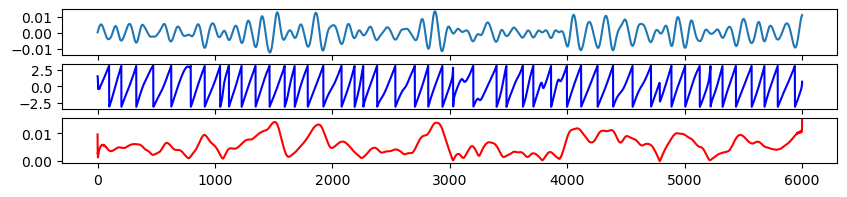

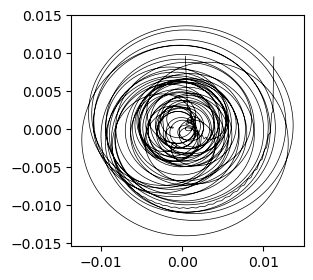

...... Computing partial autocorrelations (PACF)
...... Computing partial autocorrelations (PACF)


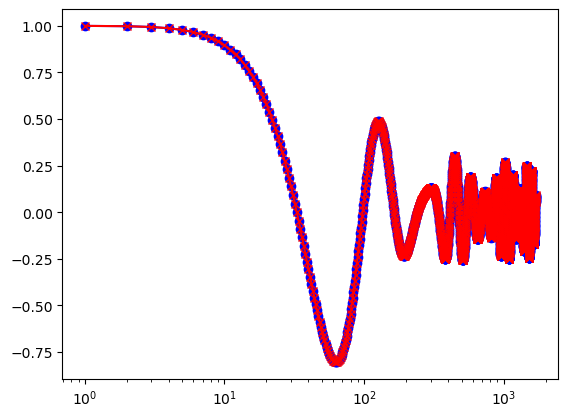

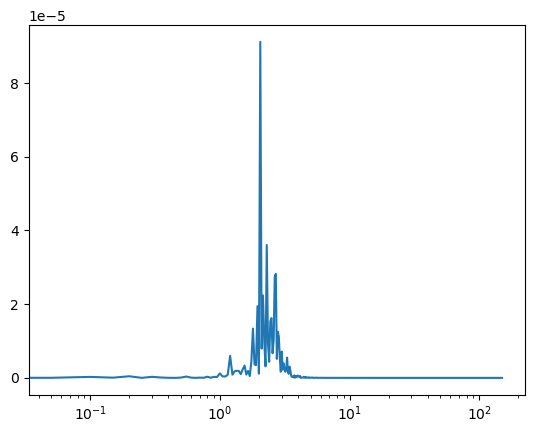

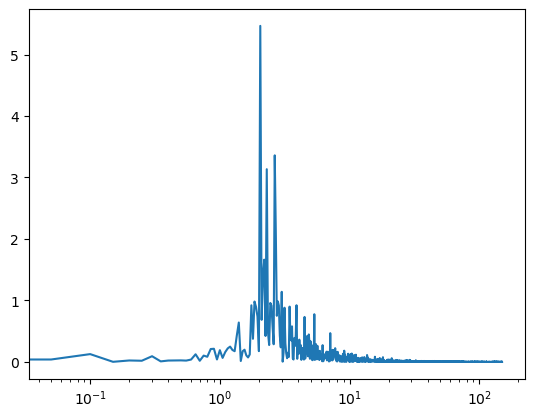

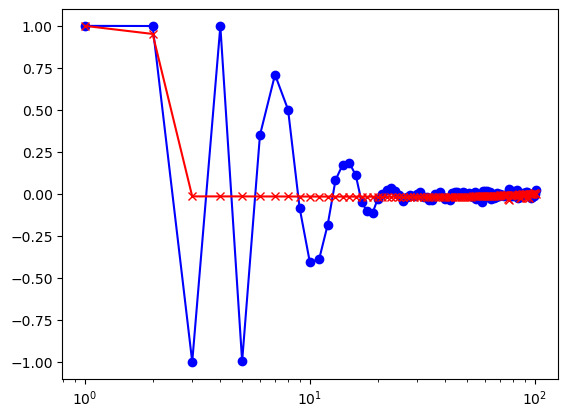

In [71]:
plt.figure(figsize=(10,2))
plt.subplot(311)
plt.plot(x1)
plt.subplot(312)
plt.plot(a1,'-b')
plt.subplot(313)
plt.plot(s1,'-r')
plt.show()


plt.figure(figsize=(3,3))
plt.plot(h1.real,h1.imag,'-k',lw=.5)
plt.xlabel("real - Hilbert")
plt.ylabel("imag - Hilbert")
plt.show()

#ACF
acf1_ = stats_ts.autoCorrFunc(x1,nlags_=1700,fft_=False,plot=False)
acf2_= stats_ts.autoCorrFunc(a1,nlags_=1700,fft_=False,plot=False)

plt.figure()
plt.semilogx(np.arange(1,len(acf1_)+1),acf1_,'-ob')
plt.semilogx(np.arange(1,len(acf1_)+1),acf1_,'-xr')
plt.ylabel('ACF')


#PSD
plt.figure()
freq1, pxx1 = signal.periodogram(x1, fs=300)
plt.semilogx(freq1,pxx1)

plt.figure()
freq1, pxx1 = signal.periodogram(a1, fs=300)
plt.semilogx(freq1,pxx1)

#PACF
pacf1_,ci_ = stats_ts.partAutoCorrFunc(x1,nlags_=100,method_='ols',plot=False)
pacf2_,ci_ = stats_ts.partAutoCorrFunc(a1,nlags_=100,method_='ols',plot=False)
plt.figure()
plt.title('Partial ACF')
plt.semilogx(np.arange(1,len(pacf1_)+1),pacf1_,'-ob')
plt.semilogx(np.arange(1,len(pacf2_)+1),pacf2_,'-xr')

To do:

* Check if the phase shift close to the dominant modes shown by PSD is more influential (on TE)